In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

ROOT = os.getcwd()
WORK_DIR = os.path.dirname(ROOT)
WORK_DIR = '/'.join(WORK_DIR.split('/')[:-1])

In [120]:
df = pd.read_csv(os.path.join(WORK_DIR, 'data/USA_Housing.csv'))

# ***EDA***

In [4]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
# Check imputation in dataframe
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.describe(percentiles=[i / 100 for i in range(10, 100, 10)])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
20%,59764.699966,5.154306,6.132222,3.060000,27719.973644,9.380628e+05
30%,62931.344646,5.460120,6.462623,3.220000,30995.404698,1.048002e+06
40%,65985.991022,5.707459,6.743882,3.390000,33578.782713,1.139514e+06
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
60%,71341.455116,6.245433,7.258575,4.220000,38733.537073,1.323069e+06


In [121]:
# replace name of features
df.rename(columns={'Avg. Area Income': 'avg_area_income', 'Avg. Area House Age': 'avg_area_house_age', 'Avg. Area Number of Rooms': 'avg_area_rooms', 'Avg. Area Number of Bedrooms': 'avg_area_bedrooms', 'Area Population': 'area_population'}, inplace=True)
df

,avg_area_income,avg_area_house_age,avg_area_rooms,avg_area_bedrooms,area_population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


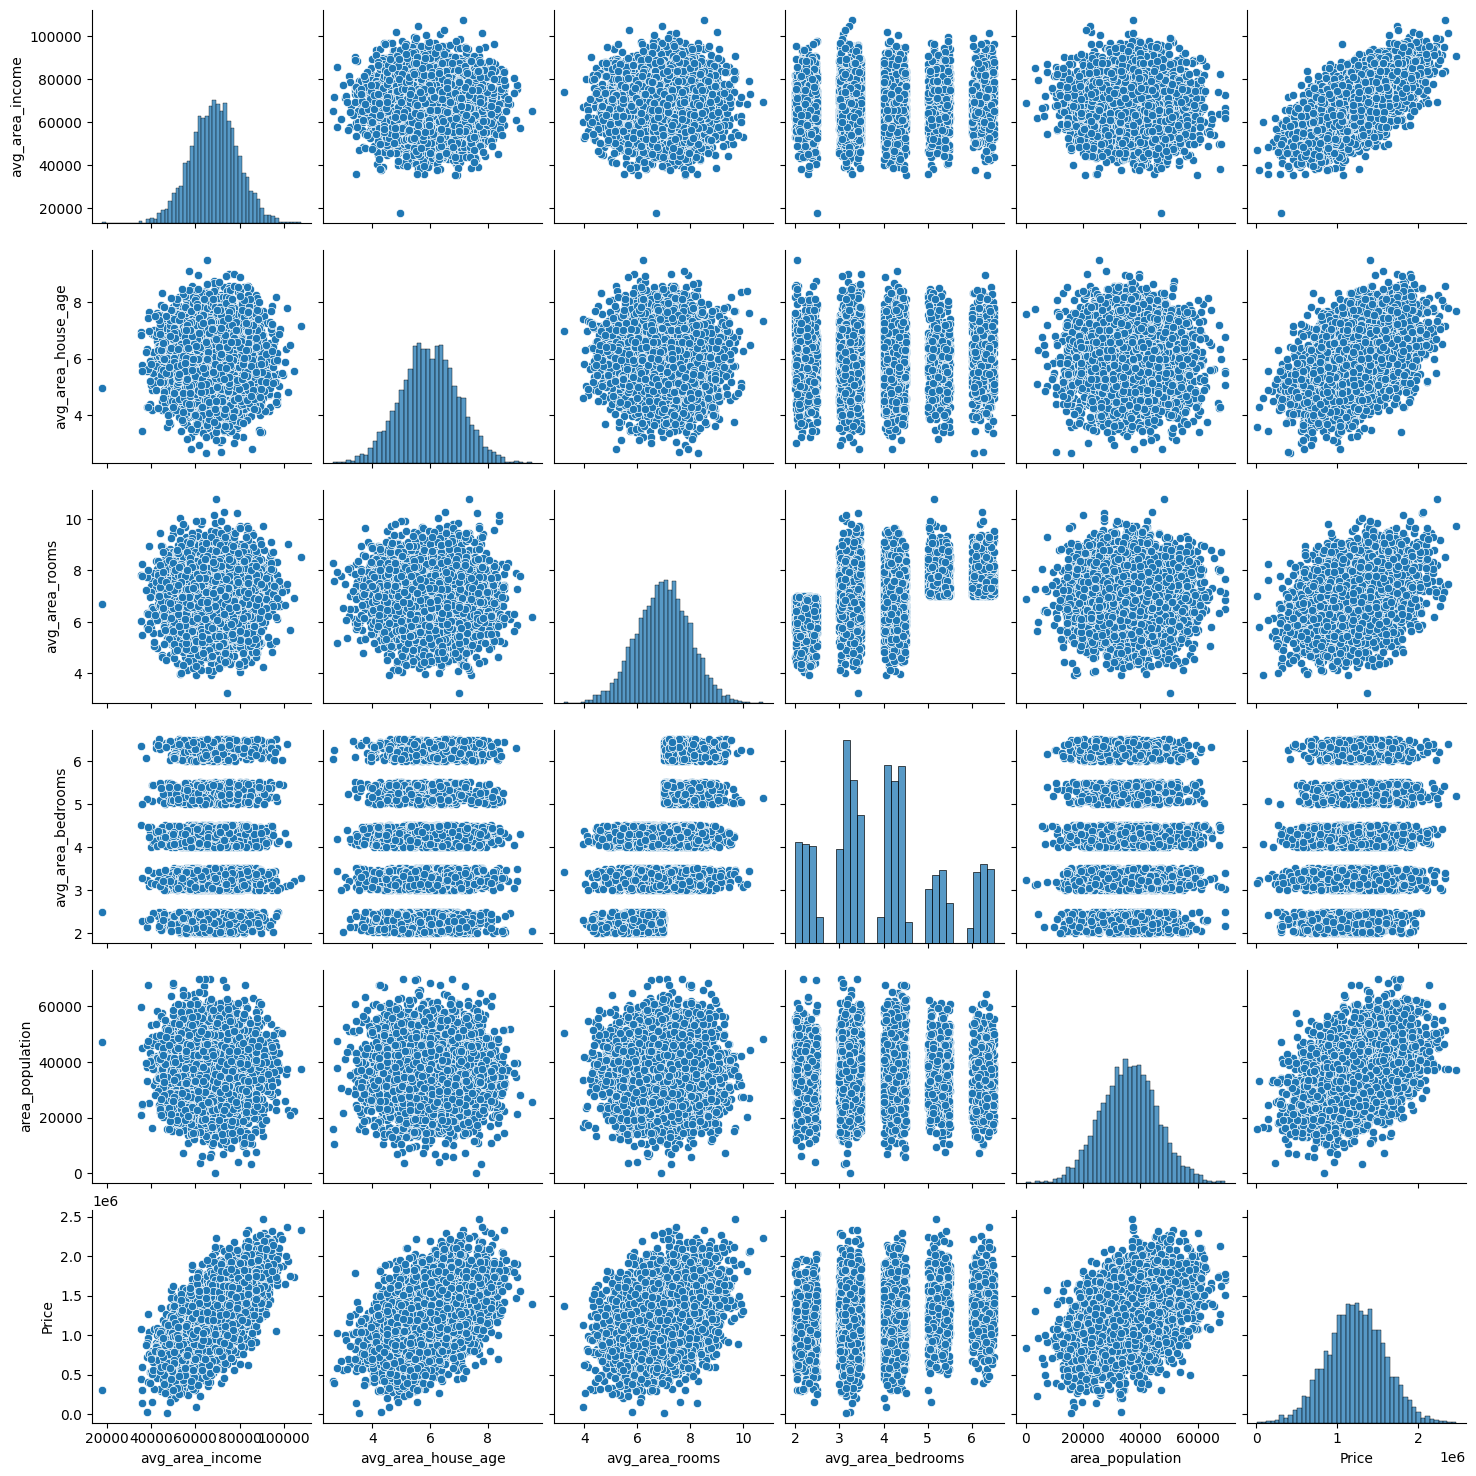

In [9]:
sns.pairplot(df.select_dtypes(exclude=object), diag_kind="hist")

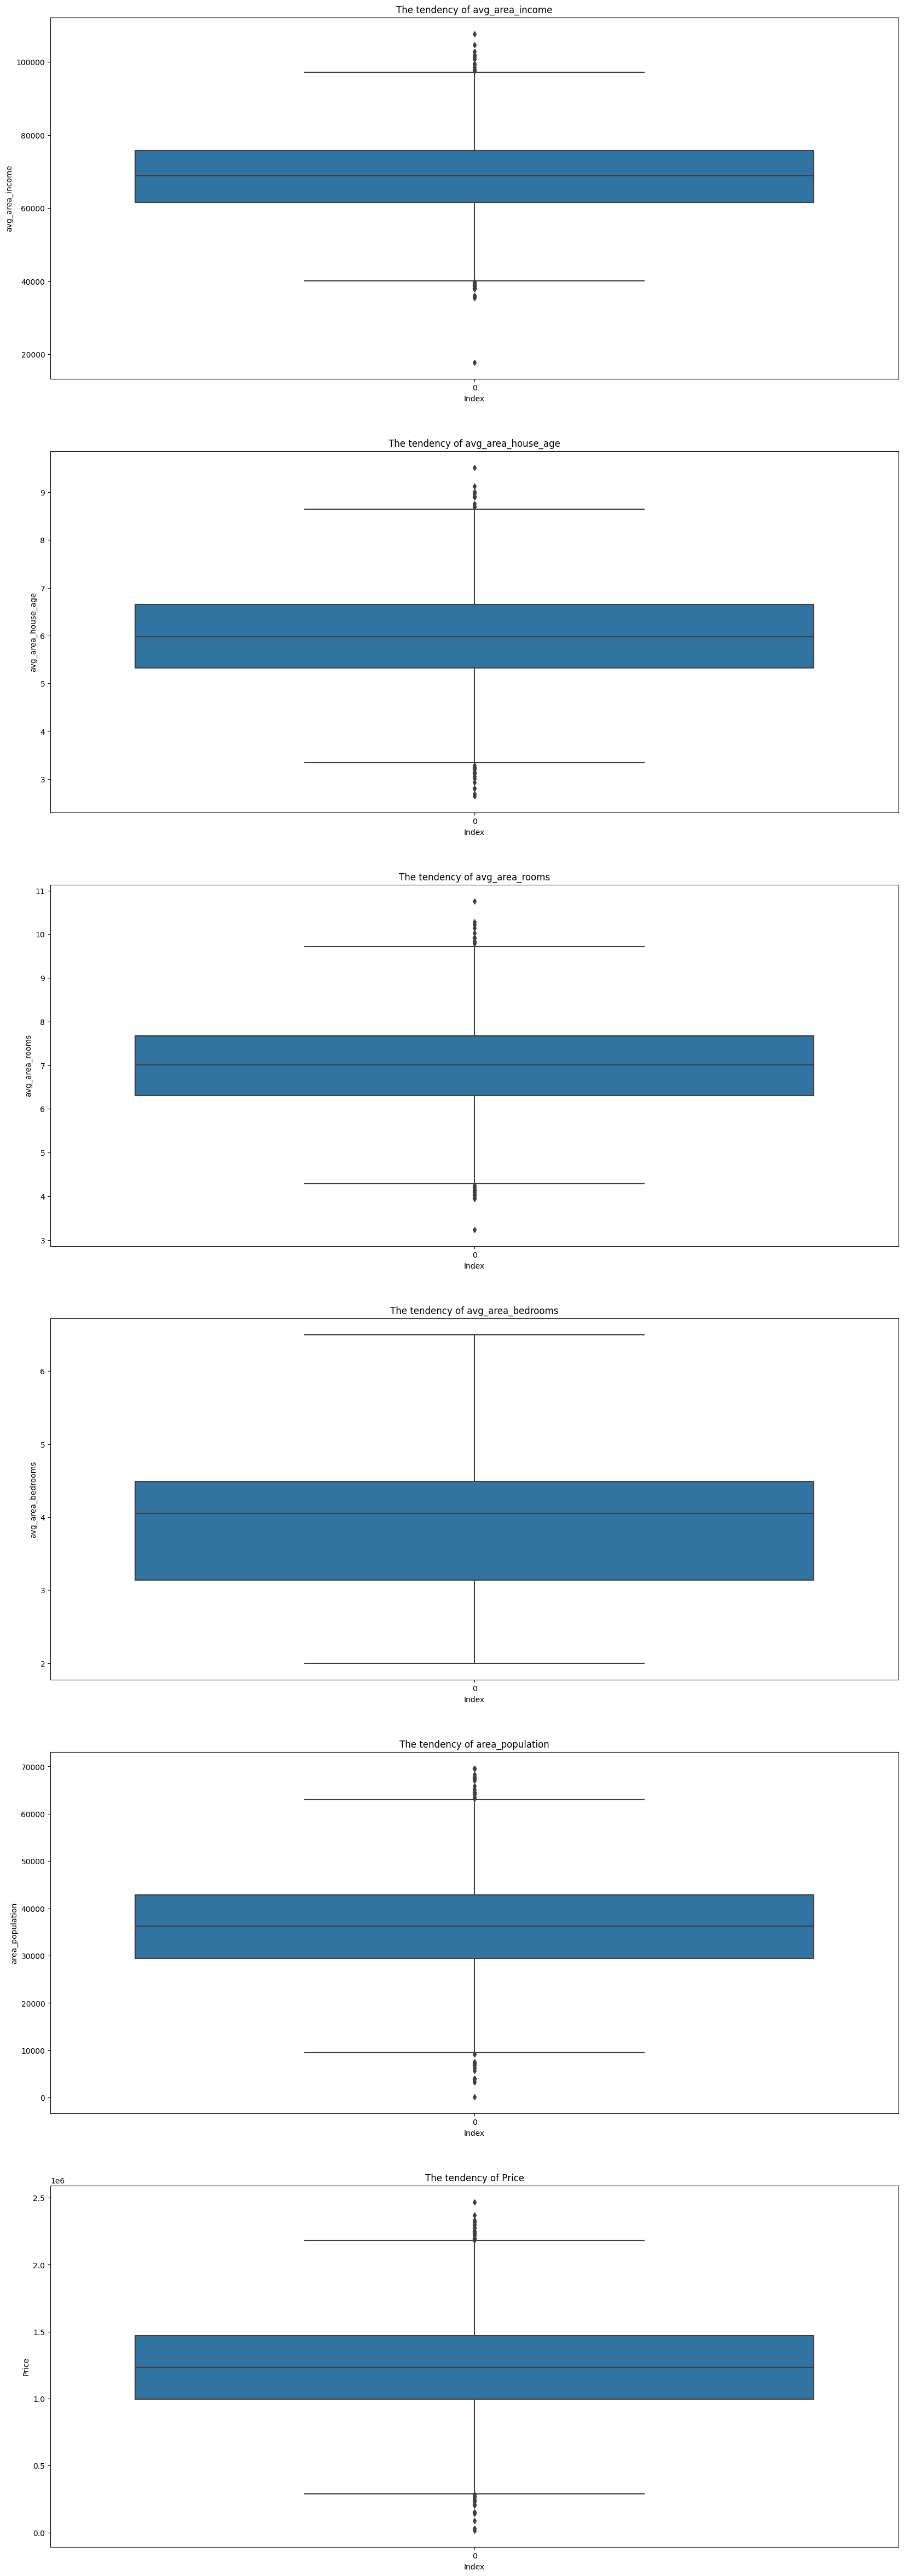

In [10]:

fig, ax = plt.subplots(6, figsize=(20, 60))
for i, col in enumerate(df.select_dtypes(exclude=object).columns.tolist()):
    sns.boxplot(data=df[col], ax=ax[i])
    ax[i].set_title(f'The tendency of {col}')
    ax[i].set_xlabel('Index')
    ax[i].set_ylabel(f'{col}')

<AxesSubplot: >

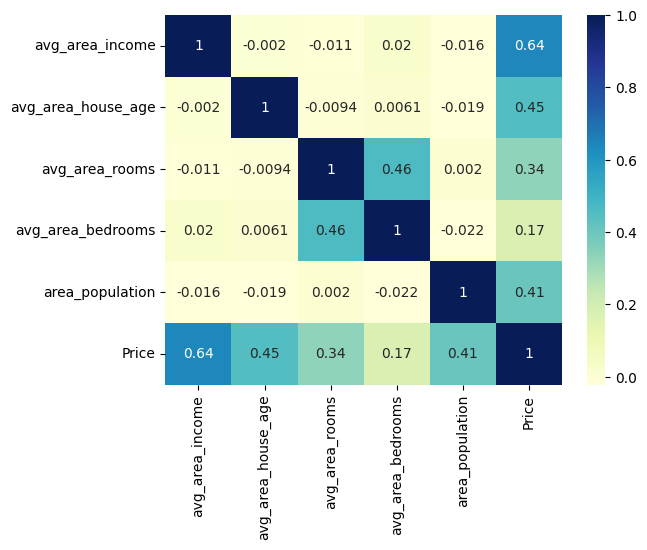

In [11]:
sns.heatmap(df.select_dtypes(exclude=object).corr(), cmap="YlGnBu", annot=True)

# ***Data Preprocessing***

In [12]:
from typing import List, Union

def remove_outliers_by_iqr(df: pd.DataFrame, col: str) -> pd.DataFrame:
    

    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    
    upper = perc75 + 1.5 * 0.75
    lower = perc25 - 1.5 * 0.25
    
    df = df[df[col] > upper]
    df = df[df[col] < lower]
    
    return df

In [13]:
new_df = remove_outliers_by_iqr(df, 'avg_area_income')

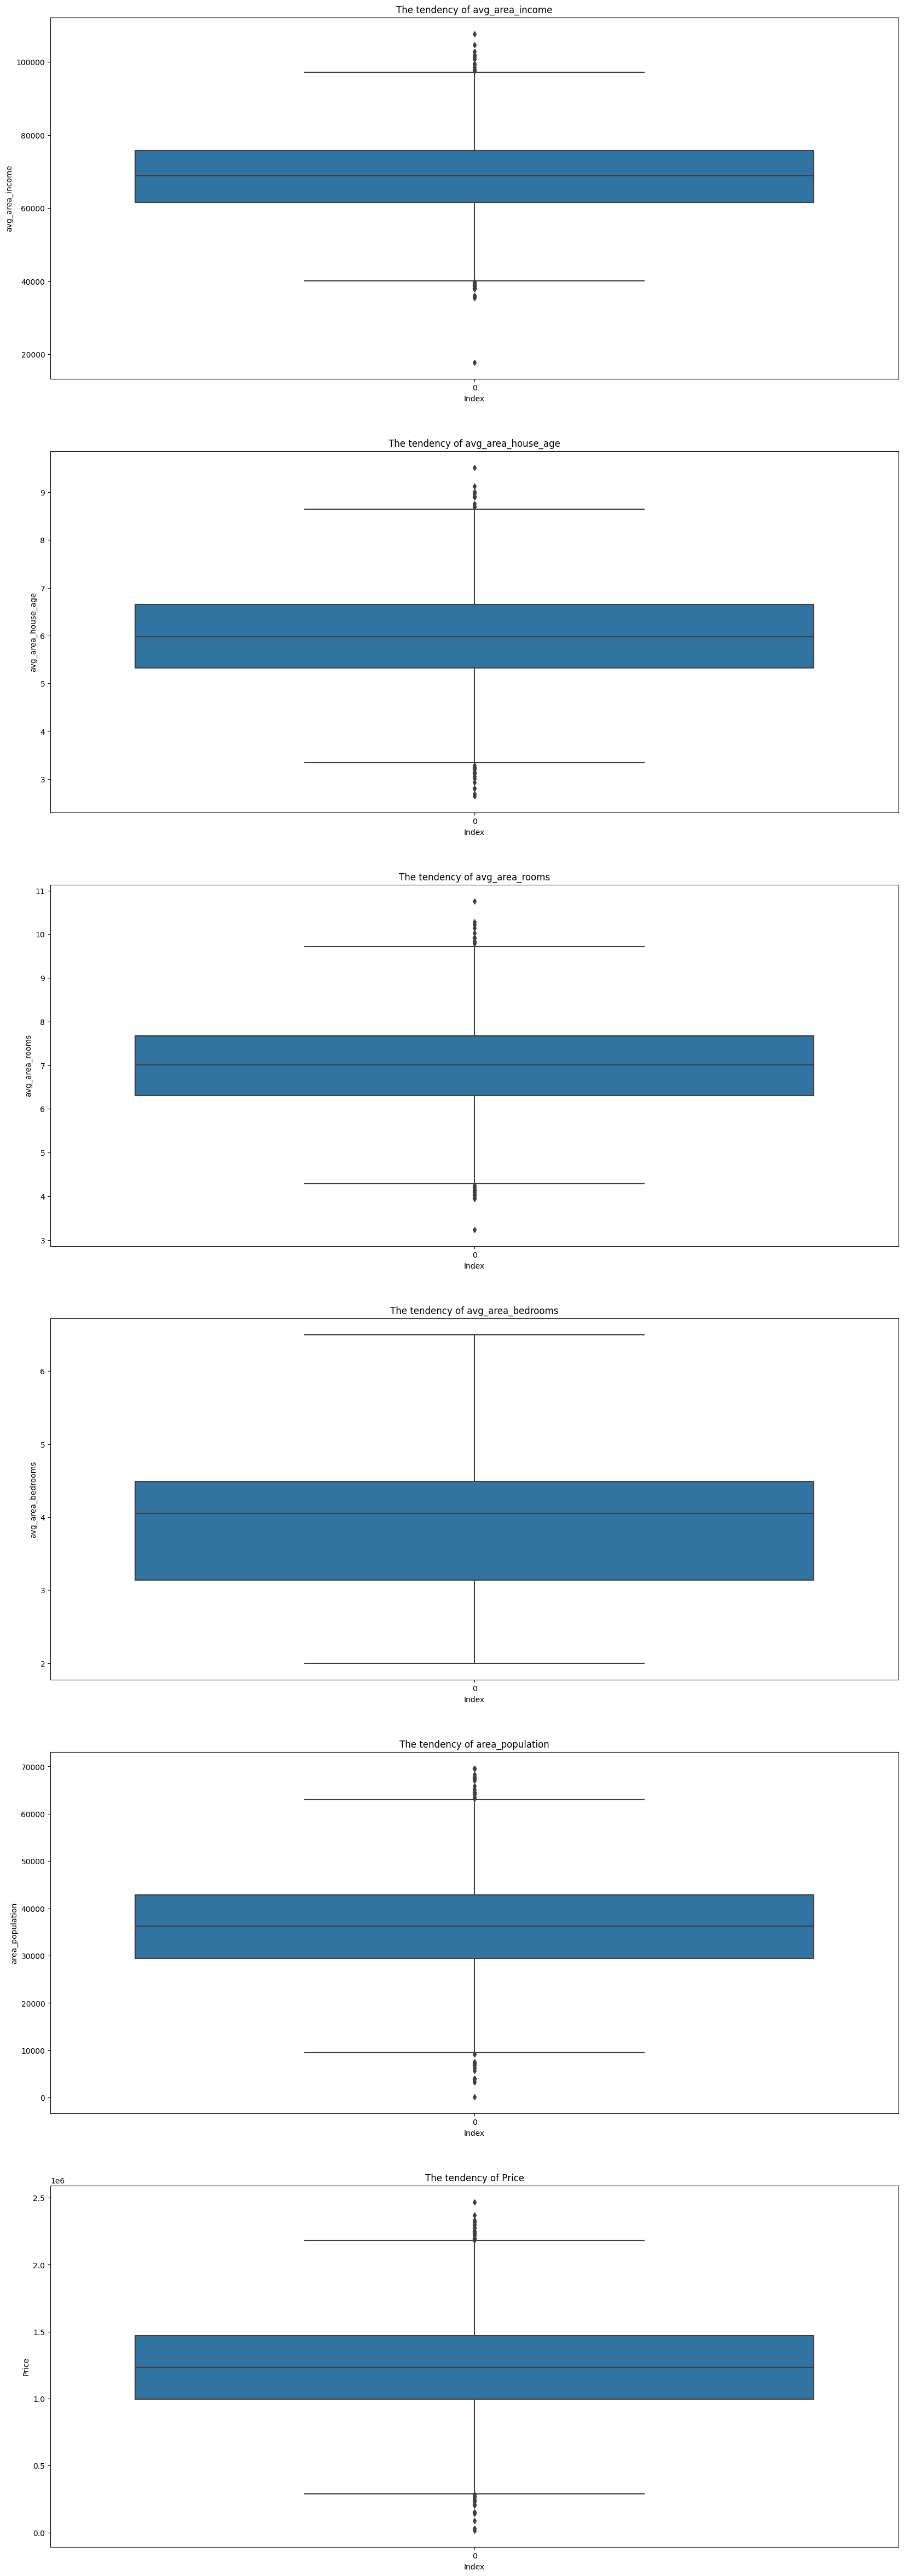

In [14]:
fig, ax = plt.subplots(6, figsize=(20, 60))
for i, col in enumerate(new_df.select_dtypes(exclude=object).columns.tolist()):
    sns.boxplot(data=df[col], ax=ax[i])
    ax[i].set_title(f'The tendency of {col}')
    ax[i].set_xlabel('Index')
    ax[i].set_ylabel(f'{col}')

# ***Feature Engineering***

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_area_income     5000 non-null   float64
 1   avg_area_house_age  5000 non-null   float64
 2   avg_area_rooms      5000 non-null   float64
 3   avg_area_bedrooms   5000 non-null   float64
 4   area_population     5000 non-null   float64
 5   Price               5000 non-null   float64
 6   Address             5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [16]:
from sklearn.preprocessing import TargetEncoder

te = TargetEncoder(smooth='auto')
df['encoded_address'] = te.fit_transform(df['Address'].to_numpy().reshape(-1, 1), df['Price'].to_numpy().reshape(-1, 1))

/Users/phamminhlong/miniconda3/envs/mlops/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
df['avg_the_other_rooms'] = df['avg_area_rooms'] - df['avg_area_bedrooms']

In [18]:
df['avg_income_population'] = df['avg_area_income'] / df['area_population']

In [75]:
df['encoded_address_by_income'] = te.fit_transform(df['Address'].to_numpy().reshape(-1, 1), df['avg_area_income'].to_numpy().reshape(-1, 1))

/Users/phamminhlong/miniconda3/envs/mlops/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot: >

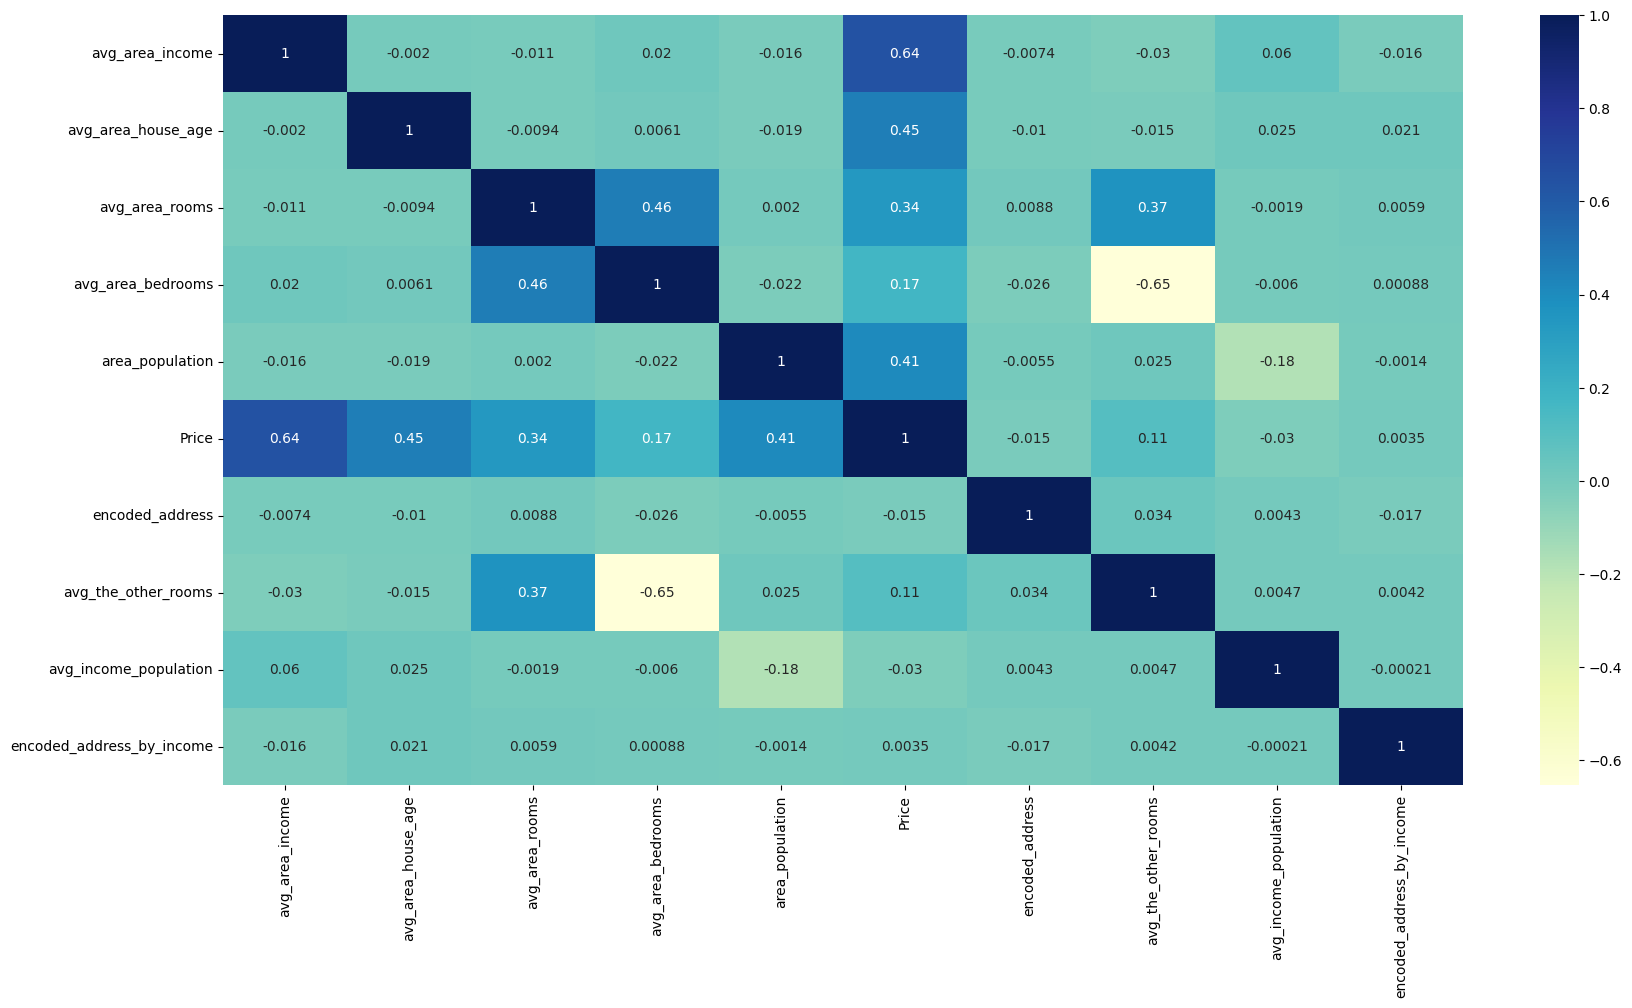

In [77]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes(exclude=object).corr(), cmap="YlGnBu", annot=True)

# ***Modeling***

In [94]:
class LinearRegression:
    
    def __init__(self, C=1, penalty=None, lr=1e-2, iters=1000) -> None:
        self.w = None
        self.b = None
        self.lr = lr
        self.iters = iters
        self.C = C
        self.losses = []
        self.penalty = penalty
        
    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        
        self.w = np.zeros(n_features, dtype=np.float64)
        self.b = 0
        
        
        for _ in range(self.iters):
            y = np.dot(X_train, self.w) + self.b
        
            if self.penalty == 'l1':
                reg = np.sum(np.abs(self.w))
                dev = (1 / self.C)
            elif self.penalty == 'l2':
                reg = np.sum(np.power(self.w, 2))
                dev = 2 * (1 / self.C)
            else:
                reg = 0
                dev = 0
            
            loss = np.sum((y_train - y) ** 2) + (1 / self.C) * reg 
            
            if loss >= np.inf:
                self.iters = _
                break
            
            print('Loss: ', loss)
            self.losses.append(loss)
            self.w += self.lr * np.dot(X_train.T, (y_train - y)) + dev
            self.b += self.lr * np.sum(y_train - y) 
            
    def predict(self, X_test):
        y_pred = np.dot(X_test, self.w) + self.b
        return np.abs(y_pred)

In [95]:
from sklearn.model_selection import train_test_split

# feature selection
new_x = df[['avg_area_income', 'avg_area_house_age', 'avg_area_rooms', 'area_population', 'encoded_address']]

X_train, X_test, y_train, y_test = train_test_split(new_x, df['Price'], test_size=0.2)

In [96]:
lr = LinearRegression(lr=1e-4, penalty='l1')
lr.fit(X_train.values, y_train.values)

Loss:  6567070712629946.0
Loss:  2.255668808571656e+39
Loss:  8.382472933719984e+62
Loss:  3.115078429686985e+86
Loss:  1.1576194399705396e+110
Loss:  4.3019230431779607e+133
Loss:  1.5986723469240047e+157
Loss:  5.940955352217298e+180
Loss:  2.2077663734504593e+204
Loss:  8.204458829873903e+227
Loss:  3.0489251716382435e+251
Loss:  1.133035693762167e+275
Loss:  4.210565399508709e+298


/var/folders/l3/nmmhn_j97ssg8t3hcyzck85m0000gn/T/ipykernel_70803/172954629.py:32: RuntimeWarning: overflow encountered in square
  loss = np.sum((y_train - y) ** 2) + (1 / self.C) * reg


# ***Evaluation***

In [99]:
df_plot = pd.DataFrame({"losses": lr.losses, 'iters': list(range(0, lr.iters))})

<AxesSubplot: xlabel='iters', ylabel='losses'>

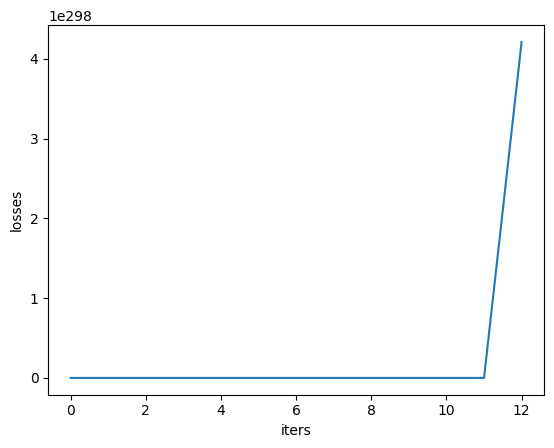

In [100]:
sns.lineplot(data=df_plot, x='iters', y='losses')

In [101]:
predict = lr.predict(X_test.values)

In [102]:
def MSE(y_true, y_pred):
    return 1 / y_pred.shape[0] * np.sum(np.abs(y_true - y_pred))

## ***the results from original features***

In [72]:
MSE(y_test.values, predict)

2.1319225833289606e+156

In [73]:
df_output = pd.concat([X_test, y_test, pd.Series(predict, name='PricePrediction', index=X_test.index)], axis=1)
df_output

,avg_area_income,avg_area_house_age,avg_area_rooms,avg_area_bedrooms,area_population,Price,PricePrediction
34,55909.322295,5.419563,9.289854,6.00,22355.235407,9.363690e+05,1.653796e+156
3716,65903.250658,6.616682,7.062269,3.17,45208.387659,1.393897e+06,2.191557e+156
4554,75654.777016,7.077079,6.501047,3.15,49451.178541,1.900789e+06,2.484420e+156
2497,64534.465910,3.883364,7.382973,4.22,52933.672583,1.202228e+06,2.257295e+156
2652,68923.684861,6.647406,6.581800,4.29,40903.558910,1.299430e+06,2.210116e+156
...,...,...,...,...,...,...,...
18,63508.194299,5.947165,7.187774,5.12,35719.653052,1.019426e+06,2.011165e+156
2313,75967.135085,5.939370,6.111658,2.32,38897.091584,1.405505e+06,2.356533e+156
790,64506.790064,6.384604,7.551429,6.07,41521.439926,1.427202e+06,2.110076e+156
4597,89026.809419,6.460577,7.811779,5.40,38039.550565,1.978630e+06,2.664773e+156


## ***the results of transformed features***

In [103]:
MSE(y_test.values, predict)

1.9778414206036004e+159

In [104]:
df_output = pd.concat([X_test, y_test, pd.Series(predict, name='PricePrediction', index=X_test.index)], axis=1)
df_output

,avg_area_income,avg_area_house_age,avg_area_rooms,area_population,encoded_address,Price,PricePrediction
2058,67951.748534,5.503080,6.469594,38731.293786,1.233634e+06,1.283209e+06,1.980391e+159
3518,64144.074207,5.317710,7.314848,33561.705103,1.231052e+06,1.022710e+06,1.975681e+159
4971,73491.134427,5.784430,4.425959,30800.541060,1.231052e+06,1.111307e+06,1.976384e+159
4554,75654.777016,7.077079,6.501047,49451.178541,1.232919e+06,1.900789e+06,1.980436e+159
1243,56281.205225,5.269658,7.851384,29141.739777,1.232919e+06,9.625019e+05,1.977759e+159
...,...,...,...,...,...,...,...
4697,87674.453688,5.777765,7.698070,28470.827408,1.233634e+06,1.566015e+06,1.981667e+159
1002,71517.014241,7.905595,7.731386,40239.282575,1.231052e+06,1.734373e+06,1.976650e+159
4047,59563.084941,6.167697,7.645777,24196.141469,1.232919e+06,9.065438e+05,1.977820e+159
439,64038.993885,4.025768,7.526834,54130.975953,1.232919e+06,1.194710e+06,1.979621e+159


<AxesSubplot: ylabel='PricePrediction'>

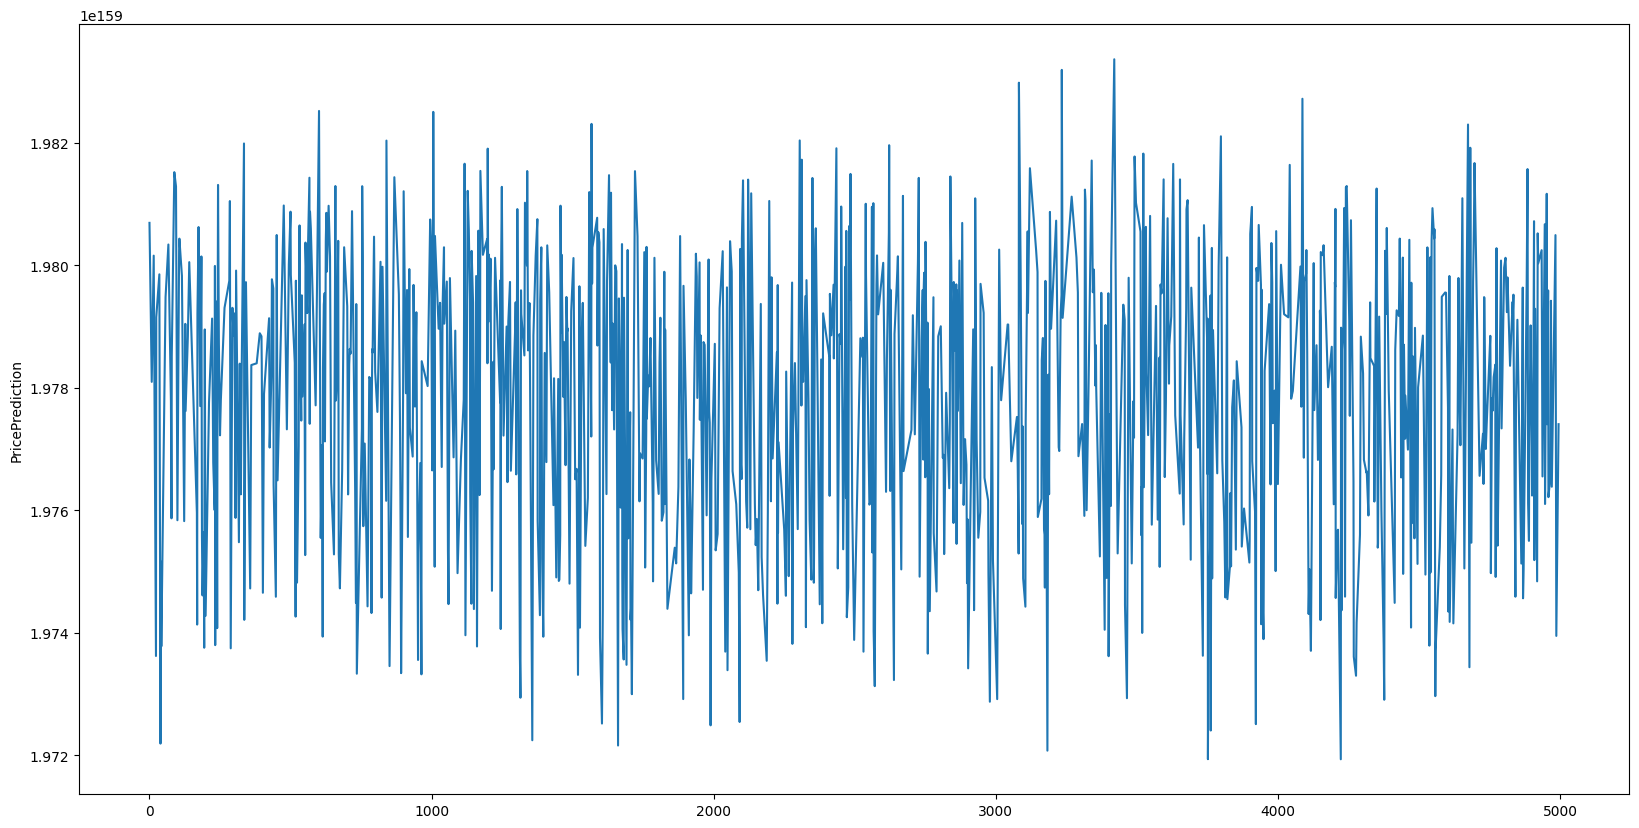

In [113]:
plt.figure(figsize=(20, 10))
sns.color_palette("flare")
sns.lineplot(data=df_output['PricePrediction'])
# sns.scatterplot(data=df_output['avg_area_income'])

<AxesSubplot: ylabel='avg_area_income'>

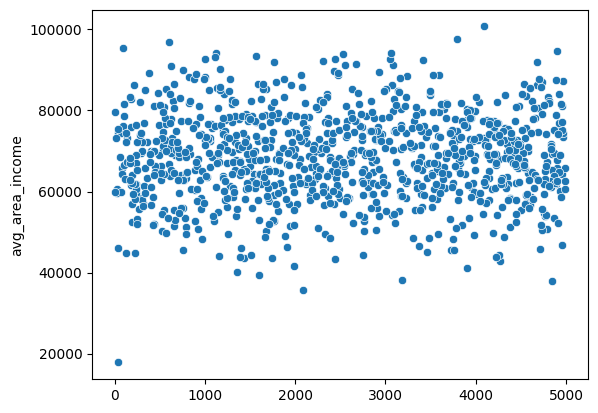

In [114]:
sns.scatterplot(data=df_output['avg_area_income'])

In [134]:
df.shape[1]

7

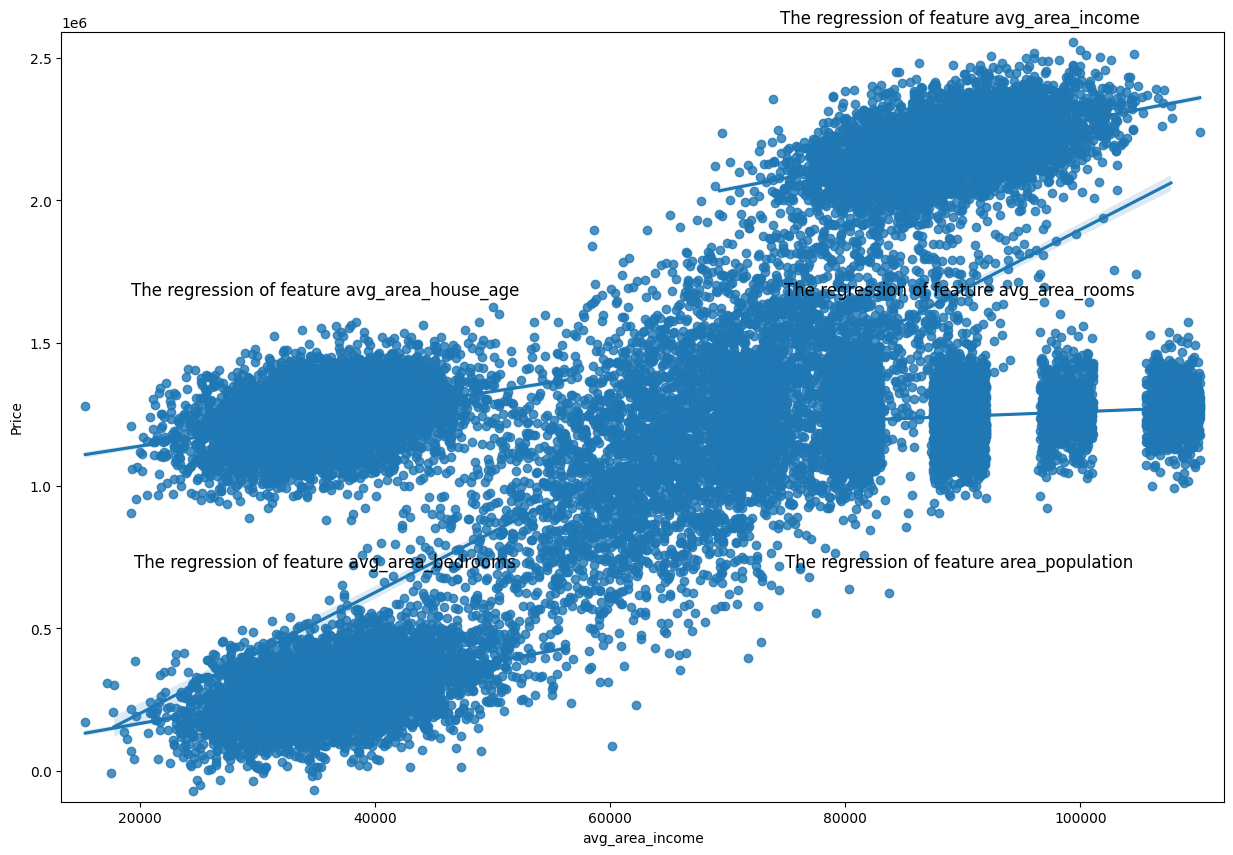

In [137]:
fig = plt.figure(figsize=(15, 10))

numeric_df = df.loc[:, df.columns != 'Price'].select_dtypes(exclude=object)

columns = int(np.sqrt(numeric_df.shape[1]))
rows = int(np.ceil(numeric_df.shape[1] / columns))


for i in range(2, columns*rows + 1):
    sns.regplot(data=df, x=numeric_df[numeric_df.columns.tolist()[i-2]], y='Price')
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title(f'The regression of feature {numeric_df.columns.tolist()[i-2]}')

    if i == columns*rows + 2 - 1:
        break
    
    plt.axis("off")
    
plt.show()